## Pacakge preparation for the Project

In [1]:
!python --version

Python 3.10.5


In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn plotly openpyxl


  Using cached pandas-2.3.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached plotly-6.5.2-py3-none-any.whl.metadata (8.5 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-c

In [3]:
pip list

Package           VersionNote: you may need to restart the kernel to use updated packages.

----------------- -----------
asttokens         3.0.1
colorama          0.4.6
comm              0.2.3
contourpy         1.3.2
cycler            0.12.1
debugpy           1.8.20
decorator         5.2.1
et_xmlfile        2.0.0
exceptiongroup    1.3.1
executing         2.2.1
fonttools         4.61.1
ipykernel         7.1.0
ipython           8.38.0
jedi              0.19.2
joblib            1.5.3
jupyter_client    8.8.0
jupyter_core      5.9.1
kiwisolver        1.4.9
matplotlib        3.10.8
matplotlib-inline 0.2.1
narwhals          2.15.0
nest-asyncio      1.6.0
numpy             2.2.6
openpyxl          3.1.5
packaging         26.0
pandas            2.3.3
parso             0.8.5
pillow            12.1.0
pip               26.0
platformdirs      4.5.1
plotly            6.5.2
prompt_toolkit    3.0.52
psutil            7.2.2
pure_eval         0.2.3
Pygments          2.19.2
pyparsing         3.3.2
python

### Importing the required packages

In [9]:
import pandas as pd
import numpy as np
import re

### STEP 1: Basic understanding about the dataset

***Problems in Raw Data***

* Rating contains --
* Rating count contains text like 50+ ratings
* Cost contains currency symbol ₹
* Duplicate rows
* Mixed datatypes

### STEP 2: Cleaning the Data

***Data Cleaning Logic***
   
    1. Duplicates removal
    2. Converting the rating column values to numerical values
    3. Converting the rating_count column values to numerical values
    4. Null values are dropped
    5. Save the cleaned dataset 

In [10]:
# Load the dataset 

df = pd.read_csv("swiggy.csv")

In [11]:
df.shape

(148541, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [13]:
df.isna().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [14]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [15]:
# To remove the duplicate values from the dataset

df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [17]:
# Count the "--" values

count = (df["rating"] == "--").sum()
print(count)

87014


In [18]:
# Cleaning the data in rating column

df["rating"] = df["rating"].replace("--", np.nan)
df["rating"] = df["rating"].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            148541 non-null  int64  
 1   name          148455 non-null  object 
 2   city          148541 non-null  object 
 3   rating        61441 non-null   float64
 4   rating_count  148455 non-null  object 
 5   cost          148410 non-null  object 
 6   cuisine       148442 non-null  object 
 7   lic_no        148312 non-null  object 
 8   link          148541 non-null  object 
 9   address       148455 non-null  object 
 10  menu          148541 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 12.5+ MB


In [20]:
df["rating_count"].sample(25)

98697     Too Few Ratings
13200     Too Few Ratings
7393          50+ ratings
18139     Too Few Ratings
30031     Too Few Ratings
9304          20+ ratings
5734      Too Few Ratings
39044     Too Few Ratings
126512    Too Few Ratings
108331       500+ ratings
143513    Too Few Ratings
9685          20+ ratings
82842         20+ ratings
11212         20+ ratings
21715     Too Few Ratings
27705     Too Few Ratings
53609     Too Few Ratings
30259     Too Few Ratings
31788         50+ ratings
68035     Too Few Ratings
82953     Too Few Ratings
93623        100+ ratings
129024    Too Few Ratings
34530        100+ ratings
111140    Too Few Ratings
Name: rating_count, dtype: object

In [21]:
# Cleaning the data in rating count column

df['rating_count'] = df['rating_count'].apply(
    lambda x: int(re.sub(r'\D', '', str(x))) if pd.notnull(x) and re.search(r'\d', str(x)) else 0
    )

In [22]:
# To validate the cleaning of data in rating_count column

df["rating_count"].sample(25)

72002       0
135779      0
73981     100
47842      50
132575      0
25301       0
52951      20
66058       0
143434      0
55072       0
80170       0
22713       0
15332     100
45383       0
31401       0
49361       0
45754     100
89410       0
49525      20
132305      0
23862     500
33359     100
100902     20
12001       0
78377       0
Name: rating_count, dtype: int64

In [23]:
df["cost"].sample(25)

82145     ₹ 300
86898     ₹ 100
1882      ₹ 250
80618     ₹ 150
49969     ₹ 150
115204    ₹ 150
68077     ₹ 100
131559    ₹ 200
62418     ₹ 250
72941     ₹ 500
71085     ₹ 250
143637    ₹ 200
82699     ₹ 250
101262    ₹ 250
12482     ₹ 200
33055     ₹ 250
20425     ₹ 200
123045    ₹ 300
26878     ₹ 200
45967      ₹ 60
128112    ₹ 299
42869     ₹ 250
69619     ₹ 250
21766     ₹ 250
131528    ₹ 800
Name: cost, dtype: object

In [78]:
# Cleaning the data of Cost

df['cost'] = df['cost'].apply(
    lambda x: int(re.sub(r'\D', '', x)) if isinstance(x, str) and re.search(r'\d', x) else np.nan
)

In [25]:
df["cost"].sample(25)

66369     350.0
70883     100.0
21937     300.0
40053     200.0
10073     800.0
96676     300.0
120948    200.0
11519     250.0
38526     200.0
95693     200.0
385       100.0
100405    300.0
72805     150.0
89609     100.0
11271     300.0
55273     400.0
2040      200.0
146015    100.0
133255    100.0
52655     100.0
69825     100.0
9742      200.0
34665     200.0
137700    200.0
4392      300.0
Name: cost, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            148541 non-null  int64  
 1   name          148455 non-null  object 
 2   city          148541 non-null  object 
 3   rating        61441 non-null   float64
 4   rating_count  148541 non-null  int64  
 5   cost          148410 non-null  float64
 6   cuisine       148442 non-null  object 
 7   lic_no        148312 non-null  object 
 8   link          148541 non-null  object 
 9   address       148455 non-null  object 
 10  menu          148541 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 12.5+ MB


In [27]:
df.isnull().sum()

id                  0
name               86
city                0
rating          87100
rating_count        0
cost              131
cuisine            99
lic_no            229
link                0
address            86
menu                0
dtype: int64

In [28]:
# Drop the null vaues in the following column first.

df.dropna(subset=["rating", "city", "cost", "cuisine"], inplace=True)

In [29]:
df.isnull().sum()

id               0
name             0
city             0
rating           0
rating_count     0
cost             0
cuisine          0
lic_no          78
link             0
address          0
menu             0
dtype: int64

In [30]:
# Drop the null values in tthe lic_no columns too

df.dropna(subset=["lic_no"], inplace=True)

In [31]:
df.isnull().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
lic_no          0
link            0
address         0
menu            0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61343 entries, 1 to 148521
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            61343 non-null  int64  
 1   name          61343 non-null  object 
 2   city          61343 non-null  object 
 3   rating        61343 non-null  float64
 4   rating_count  61343 non-null  int64  
 5   cost          61343 non-null  float64
 6   cuisine       61343 non-null  object 
 7   lic_no        61343 non-null  object 
 8   link          61343 non-null  object 
 9   address       61343 non-null  object 
 10  menu          61343 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 5.6+ MB


In [ ]:
# Drop the unnecessary columns in the dataset

df.drop(columns=["lic_no", "link", "address", "menu", "id"], inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61343 entries, 0 to 61342
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          61343 non-null  object 
 1   city          61343 non-null  object 
 2   rating        61343 non-null  float64
 3   rating_count  61343 non-null  int64  
 4   cost          61343 non-null  float64
 5   cuisine       61343 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ MB


In [40]:
# Reset the index

df.reset_index(drop=True, inplace=True)

In [41]:
# To save the cleaned data

df.to_csv("cleaned_swiggy.csv", index=False)

### Hence the Dataset has been prepared for preprocessing!

###  STEP 3: Data Preprocessing

***In this project problem statement, they have mentioned that we have to use the One-Hot Encoding method***

The reason is that,
* Machine models requires only the numerical data
* City and Cuisine aree categorical data type
* One-Hot encoding converts categories into binary vectors 

In [42]:
from sklearn.preprocessing import OneHotEncoder
import pickle

In [43]:
# Load cleaned dataset

ds = pd.read_csv("cleaned_swiggy.csv")

In [44]:
ds.shape

(61343, 6)

In [45]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61343 entries, 0 to 61342
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          61343 non-null  object 
 1   city          61343 non-null  object 
 2   rating        61343 non-null  float64
 3   rating_count  61343 non-null  int64  
 4   cost          61343 non-null  float64
 5   cuisine       61343 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ MB


In [46]:
ds.describe()

,rating,rating_count,cost
count,61343.000000,61343.000000,61343.000000
mean,3.894513,86.091437,297.649512
std,0.460089,120.221768,170.751818
min,1.000000,1.000000,1.000000
25%,3.700000,20.000000,200.000000
50%,4.000000,50.000000,250.000000
75%,4.200000,100.000000,350.000000
max,5.000000,500.000000,3000.000000


In [47]:
ds.isnull().sum()

name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
dtype: int64

In [48]:
# Select features from the dataset

categorical_features = ['city', 'cuisine']
numerical_features = ['rating', 'rating_count', 'cost']

In [49]:
# To look at the number of unique values

city_counts = ds["city"].nunique()
print(city_counts)

777


In [50]:
# To look at the number of unique values

cuisine_counts = ds["cuisine"].nunique()
print(cuisine_counts)

1638


In [51]:
# To get the Top 20 for City column

top_20_cities = ds['city'].value_counts().nlargest(20).index
top_20_cities

Index(['Bikaner', 'Indiranagar,Bangalore', 'Noida-1', 'Koramangala,Bangalore',
       'HSR,Bangalore', 'BTM,Bangalore', 'Greater Kailash 2,Delhi',
       'Whitefield,Bangalore', 'Electronic City,Bangalore',
       'Bandra West,Mumbai', 'Kammanahalli/Kalyan Nagar,Bangalore',
       'Kukatpally,Hyderabad', 'Madhapur,Hyderabad', 'sohna road,Gurgaon',
       'Vashi,Mumbai', 'Viman Nagar,Pune', 'Patna', 'Powai,Mumbai',
       'Banjara Hills,Hyderabad', 'Arekere,Bangalore'],
      dtype='object', name='city')

In [52]:
# To get the Top 20 for Cuisine column

top_50_cuisines = ds["cuisine"].value_counts().nlargest(50).index
top_50_cuisines

Index(['North Indian,Chinese', 'Indian', 'North Indian', 'Indian,Chinese',
       'South Indian', 'Chinese', 'Pizzas', 'Bakery,Desserts',
       'Ice Cream,Desserts', 'Chinese,North Indian',
       'South Indian,North Indian', 'North Indian,Punjabi',
       'North Indian,South Indian', 'Biryani,North Indian', 'Chinese,Indian',
       'Biryani', 'Beverages', 'Biryani,Chinese', 'Bakery',
       'North Indian,Biryani', 'Desserts', 'Fast Food', 'Desserts,Ice Cream',
       'South Indian,Chinese', 'Pizzas,Italian', 'Biryani,Mughlai',
       'North Indian,Indian', 'Ice Cream', 'Desserts,Bakery',
       'Desserts,Beverages', 'Fast Food,Snacks', 'Beverages,Desserts',
       'Biryani,Indian', 'North Indian,Mughlai', 'American,Snacks', 'Snacks',
       'Chinese,Asian', 'Beverages,Snacks', 'Chinese,South Indian',
       'Indian,North Indian', 'Chinese,Thai', 'Biryani,Hyderabadi',
       'Chinese,Fast Food', 'North Indian,Tandoor', 'Sweets,Snacks',
       'North Indian,Snacks', 'American', 'Indian

In [53]:
# Grouping the rest of the values in both City and Cuisine columns to Others

ds["city"] = ds["city"].apply(lambda x: x if x in top_20_cities else 'Other City')

In [55]:
ds["city"].value_counts()

city
Other City                             52856
Bikaner                                  849
Indiranagar,Bangalore                    601
Noida-1                                  544
Koramangala,Bangalore                    483
HSR,Bangalore                            445
BTM,Bangalore                            434
Greater Kailash 2,Delhi                  414
Whitefield,Bangalore                     400
Electronic City,Bangalore                395
Bandra West,Mumbai                       391
Kammanahalli/Kalyan Nagar,Bangalore      376
Madhapur,Hyderabad                       371
Kukatpally,Hyderabad                     371
sohna road,Gurgaon                       366
Vashi,Mumbai                             355
Viman Nagar,Pune                         350
Patna                                    340
Powai,Mumbai                             336
Banjara Hills,Hyderabad                  334
Arekere,Bangalore                        332
Name: count, dtype: int64

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

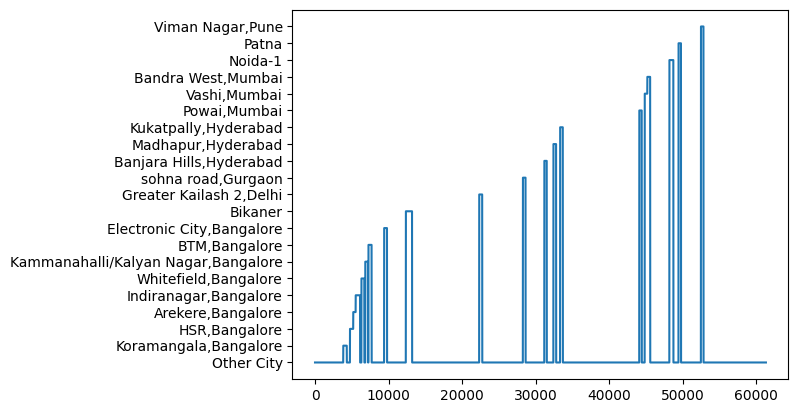

In [58]:
plt.plot(ds["city"])
plt.show()

In [59]:
ds["cuisine"] = ds["cuisine"].apply(lambda x: x if x in top_50_cuisines else 'Other Cuisine')

In [60]:
ds["cuisine"].value_counts()

cuisine
Other Cuisine                25504
North Indian,Chinese          2907
Indian                        1927
North Indian                  1869
Indian,Chinese                1825
South Indian                  1642
Chinese                       1270
Pizzas                        1185
Bakery,Desserts               1098
Ice Cream,Desserts            1046
Chinese,North Indian           957
South Indian,North Indian      866
North Indian,Punjabi           833
North Indian,South Indian      808
Biryani,North Indian           788
Chinese,Indian                 780
Biryani                        754
Beverages                      686
Biryani,Chinese                680
Bakery                         660
North Indian,Biryani           646
Desserts                       608
Fast Food                      584
Desserts,Ice Cream             582
South Indian,Chinese           559
Pizzas,Italian                 540
Biryani,Mughlai                519
North Indian,Indian            506
Ice Cream   

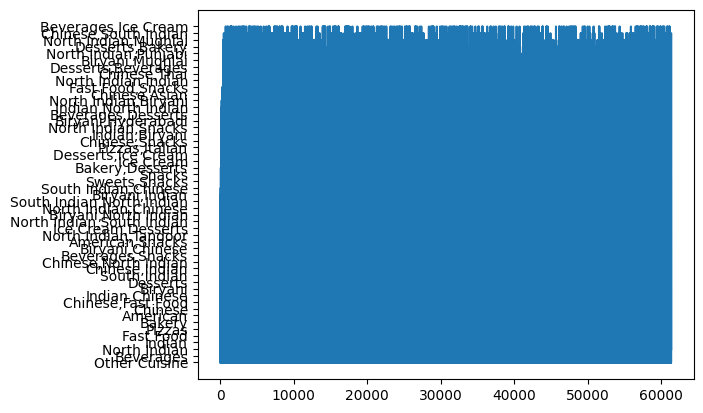

In [61]:
plt.plot(ds["cuisine"])
plt.show()

In [63]:
# After taking the top 20 Cities and Cuisines, the total no. of categories

print(ds['city'].nunique())

print(ds['cuisine'].nunique())


21
51


In [64]:
ds.shape

(61343, 6)

In [65]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61343 entries, 0 to 61342
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          61343 non-null  object 
 1   city          61343 non-null  object 
 2   rating        61343 non-null  float64
 3   rating_count  61343 non-null  int64  
 4   cost          61343 non-null  float64
 5   cuisine       61343 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ MB


In [66]:
# One-Hot Encoding for the categorical columns in the dataset

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [67]:
encoded_cat = encoder.fit_transform(ds[categorical_features])

In [68]:
encoded_cat.shape

(61343, 72)

In [69]:
# Create encoded DataFrame

encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=encoder.get_feature_names_out(categorical_features)
)

In [70]:
# Combine both the numerical + encoded categorical columns

encoded_df = pd.concat([ds[numerical_features], encoded_cat_df], axis=1)

In [71]:
# Save the encoded dataset

encoded_df.to_csv("encoded_data.csv", index=False)

In [72]:
# Save the encoder dataset

with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

### Hence the Encoded dataset and envoder has been saved successfully!

### STEP 4: Recommended Methodology

***Use Cosine Similarity***   
* Measures directional similarity
* Works well with one hot encoded datasets
* Ideal for content based recommendation

In [73]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [74]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_restaurants(user_input, encoded_data, cleaned_data, encoder, top_n=5):
    
    # Encode the input
    user_cat = encoder.transform([[user_input['city'], user_input['cuisine']]])
    
    # Combine the numerical + categorical columns as like training 
    user_vector = np.concatenate([
        [[user_input['rating'], user_input['rating_count'], user_input['cost']]],
        user_cat
    ], axis=1)
    
    # Compute the similarity
    similarity_scores = cosine_similarity(user_vector, encoded_data)[0]

    print("Max similarity:", similarity_scores.max())
    print("Mean similarity:", similarity_scores.mean())
    
    # Get top indices
    top_indices = similarity_scores.argsort()[::-1][:top_n]
    
    return cleaned_data.iloc[top_indices]

### STEP 5: Validation with an User Input data

In [75]:
# 1. To check with a dummy data

my_request = {
    'city': 'Mumbai',
    'cuisine': 'Italian',
    'rating': 4.5,
    'rating_count': 100,
    'cost': 500
}

In [76]:
# 2. To call the fuctions

recommendations = recommend_restaurants(
    user_input=my_request,        # User input values
    encoded_data=encoded_df,      # The matrix containing all restaurants
    cleaned_data=ds,              # Your original DataFrame 
    encoder=encoder               # The OneHotEncoder object
)

d:\MANI\IITM\GUVI\Swiggys_Restaurant_Recommendation_System\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Max similarity: 0.9999961541678725
Mean similarity: 0.9612630328376537


In [77]:
# 3. View the results

recommendations[['name', 'city', 'cuisine', 'rating', 'cost']]

,name,city,cuisine,rating,cost
7209,Kanti Sweets,Other City,Other Cuisine,4.5,500.0
38511,Hatari,Other City,"Chinese,Indian",4.5,500.0
51701,Shruti resto and Bar(Ratnalok),Other City,"North Indian,Mughlai",4.5,500.0
30089,Theobroma,Other City,"Desserts,Bakery",4.5,500.0
4163,Fresh Pressery Cafe,"Koramangala,Bangalore",Other Cuisine,4.5,500.0


## Hence, the project has been completed successfully!😍